In [60]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [62]:

sst_ds = xr.open_dataset('LENS2/ENSO_SST/ENSO_Project_SST_r10i1181p1f1.nc')
sst_ds = sst_ds.sel(lat=slice(-15,15),lon=slice(120,180+(180-80)))
sst = sst_ds.SST
sst

<xarray.DataArray 'SST' (time: 1980, lat: 10, lon: 43)>
[851400 values with dtype=float32]
Coordinates:
  * lat        (lat) float64 -12.72 -9.895 -7.068 -4.241 ... 7.068 9.895 12.72
  * lon        (lon) float64 121.2 125.0 128.8 132.5 ... 267.5 271.2 275.0 278.8
  * time       (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
    member_id  object ...
Attributes:
    units:         K
    long_name:     sea surface temperature
    cell_methods:  time: mean

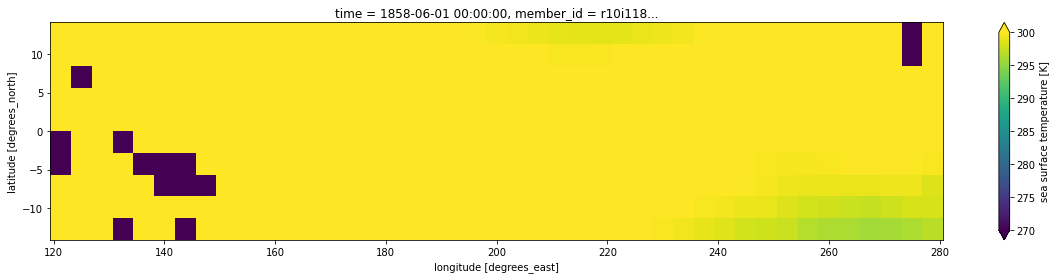

In [63]:
#Plot 1st member to check that it looks right
plt.figure(figsize=(20,4))
sst_ds.SST.isel(time=100).plot(vmax=300,vmin=270)


In [64]:
#set up X and Y for populating
X = np.zeros((10,43,12,300*10))
Y = np.zeros((12,300*10))

#randomly sample 300 times from each of the 10 ensembles
ens_names = ['1i1001','2i1021','3i1041','4i1061','5i1081','6i1101','7i1121','8i1141','9i1161','10i1181']
for ens in range(10):
    
    #get ens SST data
    print('Ensemble',ens)
    ens_name = ens_names[ens]
    ds = xr.open_dataset('LENS2/ENSO_SST/ENSO_Project_SST_r'+ens_name+'p1f1.nc')
    
    #select large tropical Pacific region
    ds = ds.sel(lat=slice(-15,15),lon=slice(120,180+(180-80)))
    sst = ds.SST
    n_months = sst.shape[0]
    
    #calculate anomaly by removing climatology
    sst_clim = sst.groupby("time.month").mean('time')  
    sst_anom = sst.groupby("time.month") - sst_clim #shape 1980,10,43 (1980 = 165*12)
    #print(sst_anom.shape)
    
    #randomly generate a num i between 1 and 165, 300 times
    for j in range(300):
        idx = ens*300 + j #for 0th ens populate indices 0-299, for 1st populate 300-599, ...
        #print('Index:',idx)
        #select a starting month from the available ensemble timesteps 
        k = np.random.randint(1,n_months-24)
        #print('K',k)
        #select random 12-month chunk using number i and make x_i
        rand_sst_xj = sst_anom[k:k+12,:,:] #shape (12,10,43)
        #reshape and populate X matrix
        rand_sst_rs = np.reshape(rand_sst_xj,(10,43,-1))
        X[:,:,:,idx] = rand_sst_rs.values
        
        #get next 12 months and calculate nino34 index to make y_i
        rand_sst_yj = sst_anom[k+12:k+24,:,:] #shape (12,10,43)
        #print(rand_sst_yj.shape)
        #print(rand_sst_yj)
        nino34_j = rand_sst_yj.sel(lat=slice(-5,5),lon=slice(190,240)).mean(dim=['lat','lon'])
        #print(nino34_j.shape) #12
        #print(nino34_j)
        Y[:,idx] = nino34_j.values
    

Ensemble 0
Ensemble 1
Ensemble 2
Ensemble 3
Ensemble 4
Ensemble 5
Ensemble 6
Ensemble 7
Ensemble 8
Ensemble 9


In [59]:
X[:,:,:,2999]


array([[[ 0.16177368,  0.15911865, -0.0100708 , ..., -0.09909058,
         -0.23095703, -0.39239502],
        [-0.3687439 , -0.28625488, -0.31262207, ..., -0.93231201,
         -1.203125  , -1.30395508],
        [-1.27764893, -1.31765747, -1.28503418, ..., -0.56671143,
         -0.37835693, -0.30212402],
        ...,
        [-0.04821777, -0.44662476, -0.59503174, ..., -0.81774902,
         -0.75466919, -0.80664062],
        [-0.85455322, -0.94866943, -1.0043335 , ..., -1.18795776,
         -1.12210083, -1.04360962],
        [-0.94692993, -0.84625244, -0.79708862, ..., -0.84057617,
         -1.11514282, -1.7026062 ]],

       [[ 0.26889038,  0.39407349,  0.46472168, ..., -1.59204102,
         -1.4161377 , -1.35394287],
        [-1.44488525, -1.57241821, -1.59945679, ..., -1.11178589,
         -1.2399292 , -1.24841309],
        [-1.10025024, -1.03024292, -0.98535156, ..., -0.69488525,
         -0.62255859, -0.55609131],
        ...,
        [-0.93270874, -1.13412476, -1.67474365, ..., -

In [58]:
Y[:,2999]

array([-0.76740384,  0.08023189, -0.05785194, -0.0102944 ,  0.20201874,
        0.32178673,  0.52912492,  0.96626222,  1.12049401,  1.24980104,
        1.24582911,  1.22024012])